# Analysis of the Palmer penguin dataset
*************

The original dataset was taken from the official Github [page](https://allisonhorst.github.io/palmerpenguins/). 

![pinguins_img](images/palmerpenguins.png)

The data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The Palmer penguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

## The goal of the analysis

The aim of this project is to analyze a dataset using Python. The objective is to identify suitable variables that can effectively analyze the data. By creating bar charts, histograms, and other types of visualizations, the project aims to provide insights into the dataset through visualization.

*Please note that I have included the references for the articles and resources I used in the README file. Further I will mark them with numbers in square brackets.*
*******

## Import the dataset and the libraries

In [178]:
# import  libraries
import pandas as pd # for working with dataframes
import numpy as np # for working with arrays and creating some visualisations and calculations
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for some visualisations

In [179]:
# download the data set 
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [180]:
# output a sample of dataset 
data.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE
92,Adelie,Dream,34.0,17.1,185.0,3400.0,FEMALE
308,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,FEMALE
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,FEMALE
145,Adelie,Dream,39.0,18.7,185.0,3650.0,MALE
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,MALE
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,FEMALE
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,MALE


I would like to check out the number of unique penguin species, islands, and other variables in this dataset. 

In [181]:
# Ref.[1]
data.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

There are **3 species of penguins**, each with **2 sexes**, and **3 different islands** in the dataset. Additionally, there are 4 columns that contain various measurements of penguins, but since these measurements are continuous numbers, there is no point to count their unique values.

Data stored in a data frame.  Each **row contains** the information of **one unique penguin** found on one of the three islands. Now I am going to use some functions to get more information of this dataset.

## Description of the dataset

In [182]:
# information about the data
# Ref.[2]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [183]:
# The data contains some NAN values. 
# I am using the isnull() method to check for the number of these values.
# Ref.[3]
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Some data is missing. As the percentage of acceptable loss was not given I allow that less than 5 %  is fine to ignore. Ref.[4]

Now I am going to find out the share of missing values.
Ref.[5]

* *data.isna()* returns a DataFrame with True/False values, where True represents missing values.

* If I take the *mean()* for each column, it will be calculated as the sum of 1s (TRUEs)   divided by the number of rows. It gives the the proportion of missing values for each column.

* To find the percentage of missing values I multiply the result by 100

In [184]:
display(data.isna().mean()*100)

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [185]:
# Cheking for duplicates in rows:
data.duplicated().sum()

0

### Summary

* Dataset contains 7 columns, 344 rows. 

* There are **3 species of penguins**, **2 sexes**, and **3 different islands** in the dataset.

* The "species", "island", and "sex" columns contain the *object type* variables. The rest of the columns contain the *flot type* of variables.

* The higer percentage of NaN values among the columns is less than 4 % of the data (column "sex"), that might be considered as acceptable.

* The are no duplicated rows in the dataset.

## Exploring data distribution across various features

Examining the distribution of data for specific variables involves analyzing how the values of those variables are spread or arranged across different possible outcomes or ranges. 

In the beginning, I would like to examine the distribution of various species across the three islands.

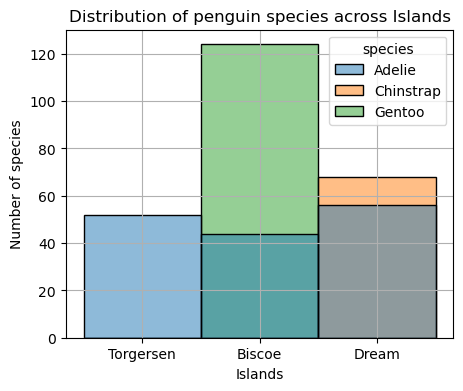

In [209]:
plt.figure(figsize=(5, 4))
sns.histplot(data= data, x= 'island', hue ='species' )
plt.title('Distribution of penguin species across Islands')
plt.xlabel('Islands')
plt.ylabel('Number of species')
plt.grid(True)
plt.show()

I am going to have a look at what is the most common **length of bill** of all penguins without specifying sex or species.

### Bill lengths across all penguin species

In [ ]:
# The histogram below shows the distribution of data by feature "bill_length_mm".
y = np.array(data['bill_length_mm']) 
plt.hist(y, bins= 'auto',edgecolor = "black",alpha = 0.3)
plt.title("Distribution based on the characteristic of bill length.")
plt.xlabel("Bill length, mm")
plt.ylabel("Frequency")
plt.show()
data['bill_length_mm'].describe()

* The mean bill length is approximately 43.92 mm, with a standard deviation of 5.46 mm. 

* The bill lengths range from 32.1 to 59.6 millimeters, indicating a diverse range of sizes within the population.
 
* The dataset exhibits a normal standart distribution, as reflected by the similarity between the mean and median values.

Now I would like to have a look at the distribution of the bill lengths among the species.

### Comparison of bill lengths across different penguin species

In [ ]:
# Checking the species we have in the dataset
data['species'].value_counts() 

In [ ]:
# creating 3 dataframe with 3 species:
adelie_data = data[data['species'] == 'Adelie']
chinstrap_data = data[data['species'] == 'Chinstrap']
gentoo_data = data[data['species'] == 'Gentoo']

In [ ]:
type(adelie_data)

In [ ]:
# creating np.array for displaying histograms
adelie_y = np.array(adelie_data['bill_length_mm']) 
chinstrap_y = np.array(chinstrap_data['bill_length_mm'])
gentoo_y = np.array(gentoo_data['bill_length_mm'])

plt.hist(adelie_y, bins= 'auto',edgecolor = "black",alpha = 0.2, label = 'Adelie')
plt.hist(gentoo_y, bins= 'auto',edgecolor = "black", alpha = 0.3,label='Gentoo')
plt.hist(chinstrap_y, bins= 'auto',edgecolor = "black", alpha = 0.3, label= 'Chinstrap')

plt.title("Distribution based on the characteristic of bill length")
plt.xlabel("Bill length,mm")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# I will use "describe" method to get clear numbers.
print("Adelie penguins(bill length).",adelie_data['bill_length_mm'].describe())
print('*************************')
print("Chinstrap penguins(bill length).", chinstrap_data['bill_length_mm'].describe())
print('*************************')
print("Gentoo penguins(bill length).", gentoo_data['bill_length_mm'].describe())


*****
## Correlation between variables    

In [ ]:
# https://www.statology.org/seaborn-title/

plot= sns.relplot(x="bill_length_mm", y='body_mass_g', col = "species", data=data,hue = "sex", kind = "scatter")


### Coefficients of correlation  between variables "bill_length_mm" and "body_mass_g" for all 3 species together.

In [ ]:
# Reference: https://realpython.com/numpy-scipy-pandas-correlation-python/#example-numpy-correlation-calculation

data['bill_length_mm'].corr(data['body_mass_g'])

There is no doubt that male spicies are more likely to have higher body mass and bill length than female spicies.
At the same time coefficients of correlation of 0.6 shows insignificant positive correlation between the variables.
That means that somthimes we can say that bill length might be bigger when the mass of the penguins higher.
On the scatter plots above we can observe that probabbly differernt species have different correlathion between these variables.
It might be a good idea to calculate the coefficient of correlation separately for male and female for every species. However,it is required to filter the data. For now I am goiing to calculate the coefficient of correlation between all the quantitive variables for all the species together. For this purpose I am going to filter the data creating a df 'data_corr' with all the quantitive variables for all the species together.


In [ ]:
data_corr = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
data_corr.head(2)

### Creating a scatterplot matrix of the correlation between all the quantitive variables of all the species together.

In [ ]:
# ref.: https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

correlation_matrix = pd.plotting.scatter_matrix(data_corr, figsize=(9, 9))



In [ ]:
# Reference: https://www.w3schools.com/python/pandas/pandas_correlations.asp#:~:text=The%20corr()%20method%20calculates,%3A%20'data.csv'.
# Calculating the coefficient of correlation between all the quantitive variables of all the species together.

Corr_Matrix = round(data_corr.corr(),2)
display(Corr_Matrix)

The correlation between the measurements of all penguin species is quite general. However, based on the correlation coefficients provided above, there is a strong correlation (0.87) between flipper length and body mass. This means that as the body mass of penguins increases, so does their flipper length. Additionally, a positive correlation (0.66) is observed between flipper length and bill length anf between the body mass and bill length.

***

# End
